In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import dtw
import networkx as nx

In [3]:
features_1 = [
    'sx_x',
    'sx_y',
    'sx_z',
    'sx_roll',
    'sx_pitch',
    'sx_yaw',
    'sx_thumb',
    'sx_forefinger',
    'sx_middle_finger',
    'sx_ring_finger',
    'sx_little_finger',
    'dx_x',
    'dx_y',
    'dx_z',
    'dx_roll',
    'dx_pitch',
    'dx_yaw',
    'dx_thumb',
    'dx_forefinger',
    'dx_middle_finger',
    'dx_ring_finger',
    'dx_little_finger'
    ]

In [4]:
path = "./tctodd/"
#path = "../../Desktop/MML Project/tctodd/"
dirs = os.listdir(path=path)
weeks = sorted([i for i in dirs if i != ".DS_Store"])
filenames = sorted(os.listdir(path+weeks[1]))

data = []
labels = dict()
label_cnt = 0

for w in weeks:
    temp_path = path+w+"/"
    filenames = sorted(os.listdir(temp_path))
    for fn in filenames:
        label = fn.split('.')[0][:-2]
        
        if label not in labels:
            labels[label] = label_cnt
            label_cnt += 1
            
        data.append({'label':labels[label], 'time_series':pd.read_csv(temp_path+fn, header=None, sep='\t',).values})
        

In [5]:
df = pd.DataFrame(data, columns=['label', 'time_series'])
df['length'] = df.time_series.apply(lambda x: x.shape[0])
seed = 0
X = df['time_series']
y = df['label']
# dictionary that maps each number to the corresponding label
num_to_labels = {v:k for k,v in labels.items()}

In [6]:
min_idx = np.argmin(df[['length']])
df[['length','label']].iloc[min_idx]

length    45
label     48
Name: 431, dtype: int64

In [10]:
G_1 = X.iloc[0] # God
A = X.iloc[1] # God
B = X.iloc[2] # God
C = X.iloc[3] # I
D = X.iloc[min_idx]
y.apply(lambda x: num_to_labels[x]).head()

0    God
1    God
2    God
3      I
4      I
Name: label, dtype: object

In [8]:
df.length.head()

0    90
1    55
2    56
3    51
4    53
Name: length, dtype: int64

In [9]:
G, C, dtw_score, shortest_path = dtw.compute_dtw(A, B, allowed_transitions=[(0,1), (1,0), (1,1)], show_graph=False)

In [10]:
nodes = sorted(G.nodes)
colors = []
for i in nodes:
    if i in shortest_path:
        colors.append('k')
    else:
        colors.append('w')

In [11]:
pos = {i:(i[1], -i[0]) for i in G.nodes}

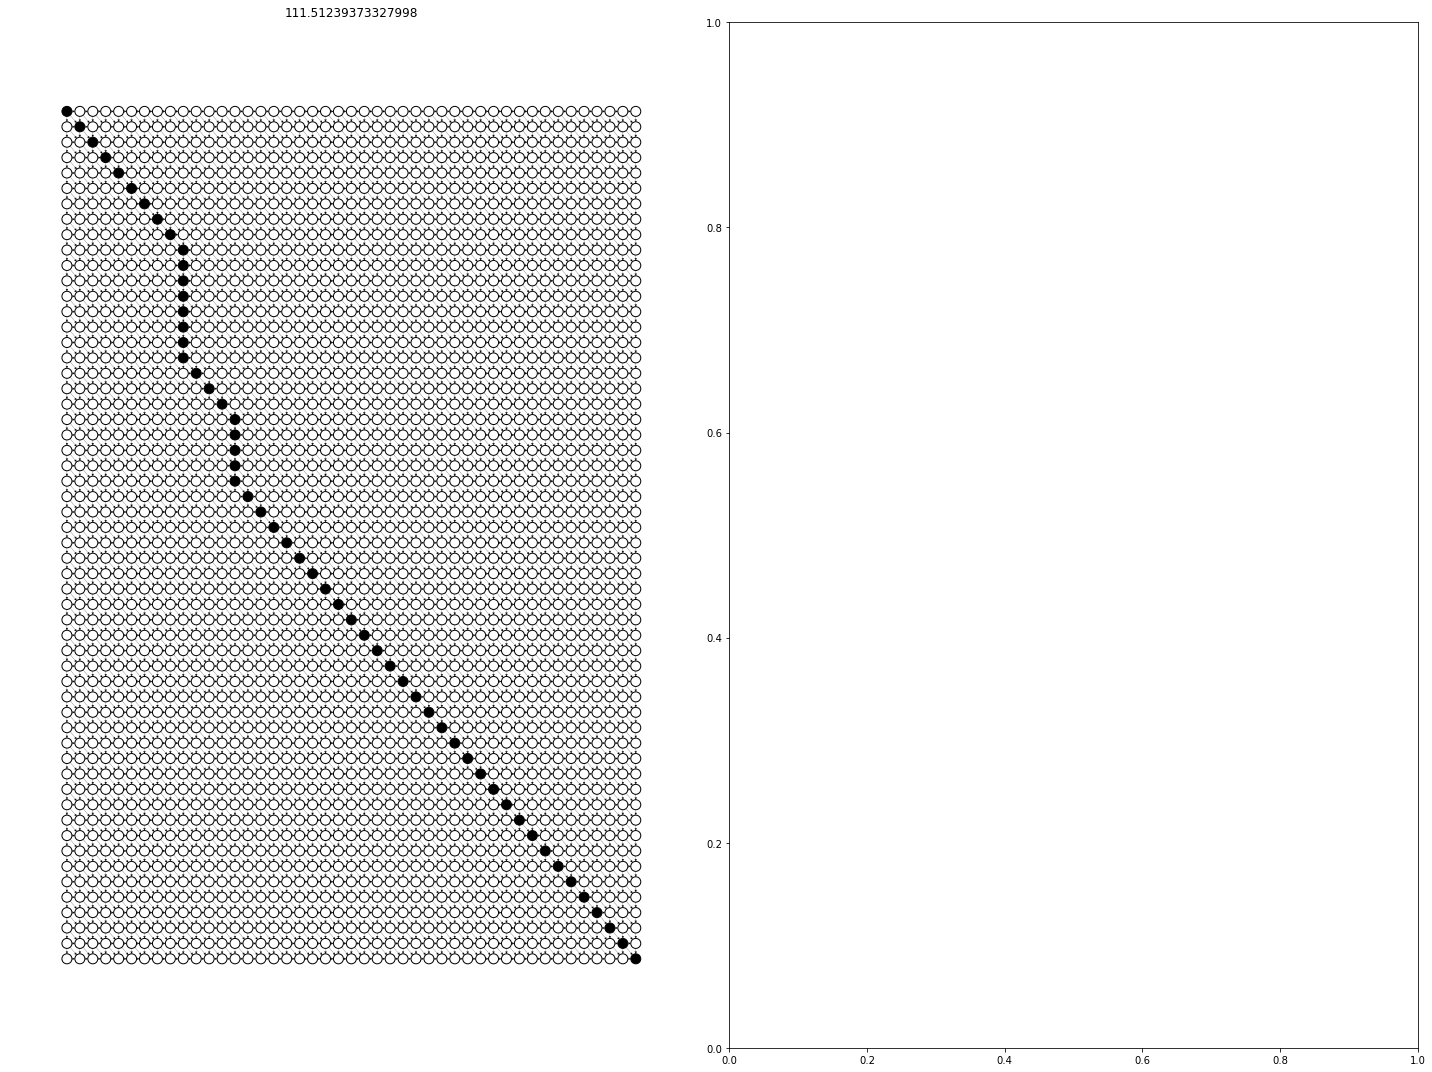

In [25]:
FIGSIZE=20,15
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=FIGSIZE)
kwargs = {'node_size':100, 'width':.2, 'node_color':colors, 'edgecolors':'k', 'arrowsize':5, 'font_size':5, 'with_labels':False}
ax[0].set_title(f'{dtw_score}')
nx.draw(G, pos=pos, ax=ax[0], **kwargs)
plt.tight_layout()
plt.savefig("B_D_prova.png", dpi=300)

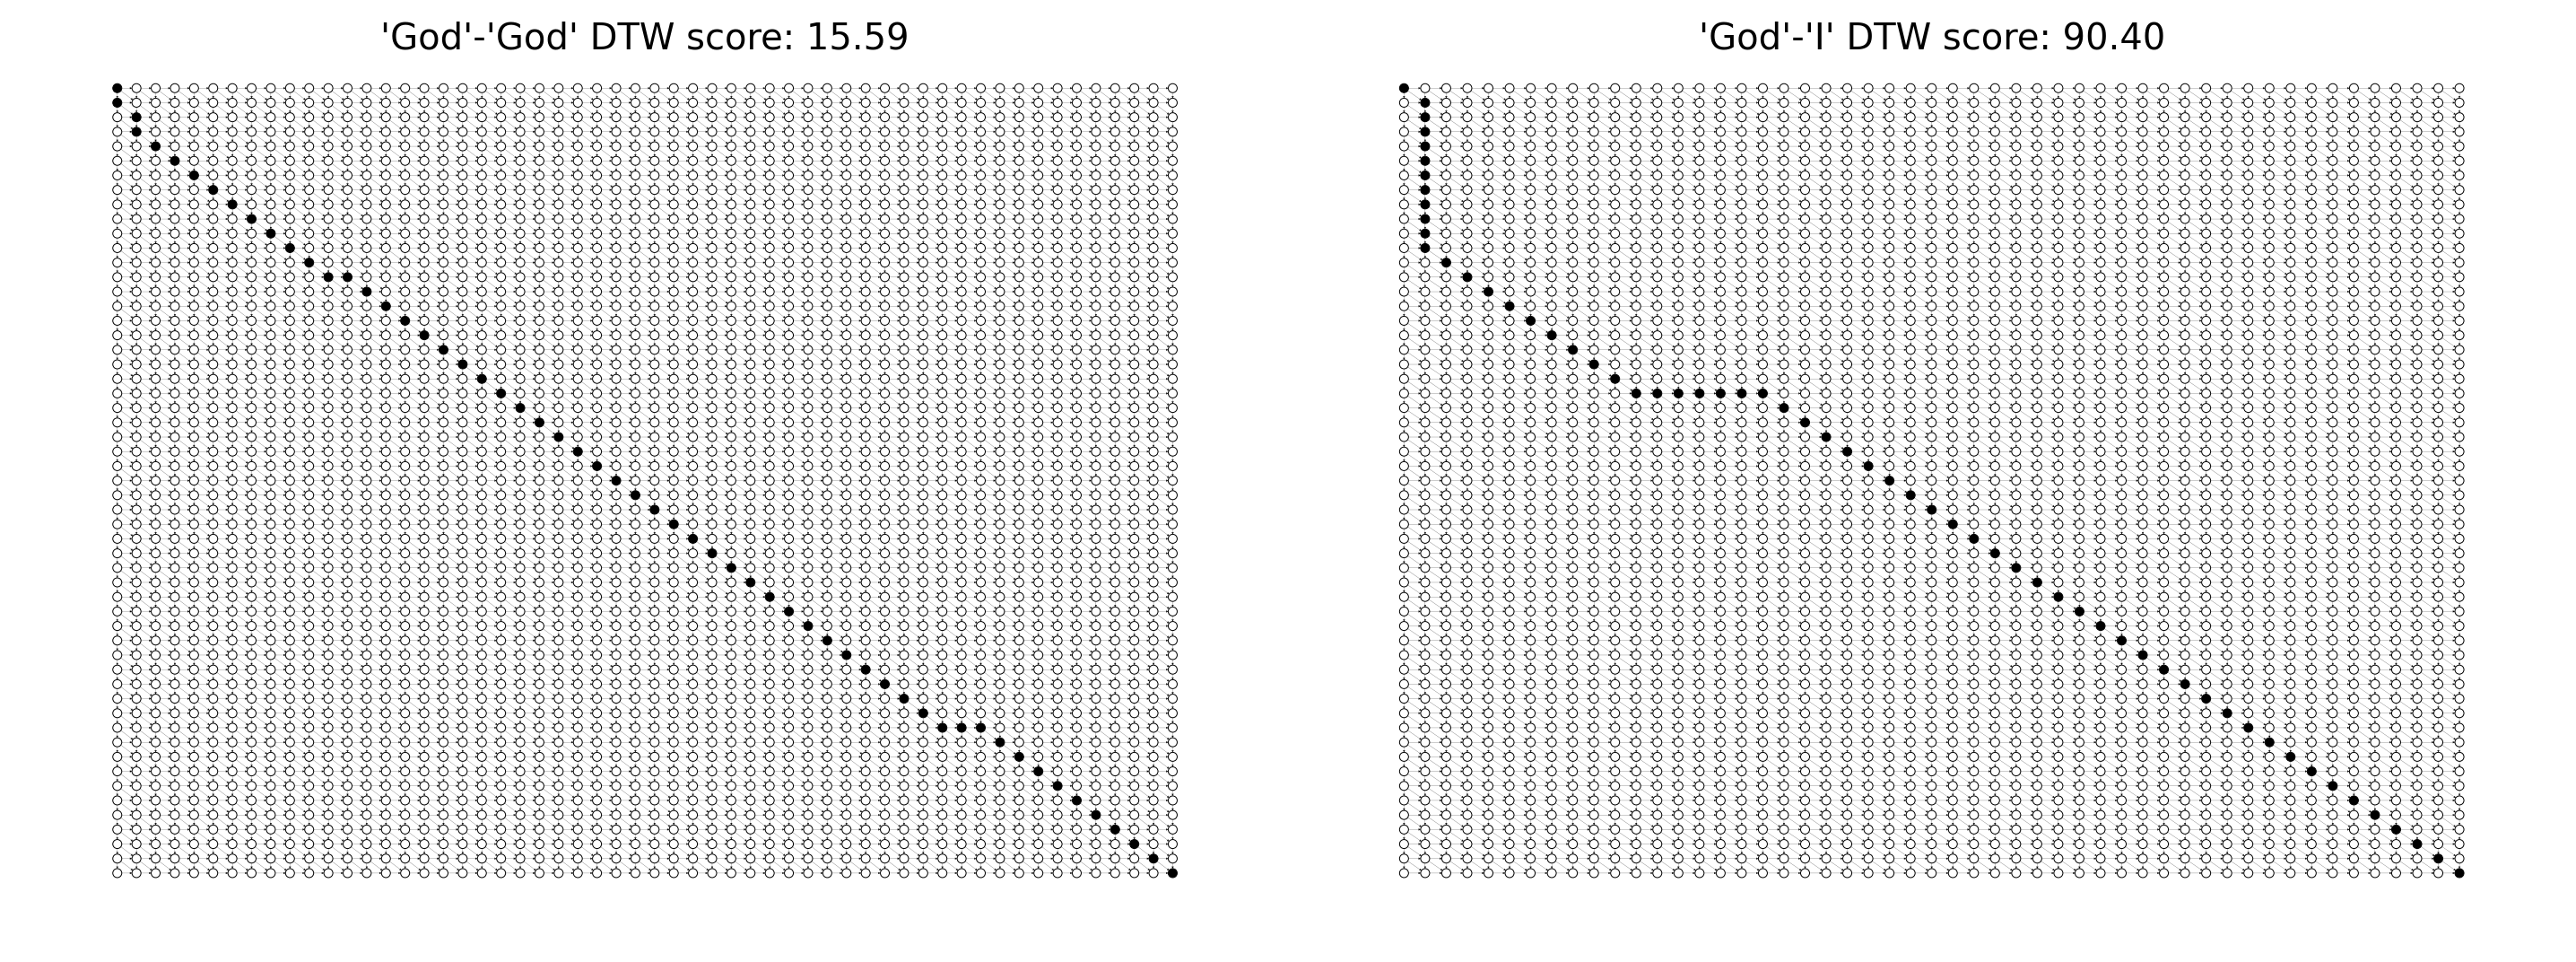

In [16]:
G_1 = X.iloc[0] # God
A = X.iloc[1] # God
B = X.iloc[2] # God
C = X.iloc[3] # I
D = X.iloc[min_idx]
y.apply(lambda x: num_to_labels[x]).head()

# same label: God, God
G_AB, _, dtw_score_AB, shortest_path_AB = dtw.compute_dtw(A, B, allowed_transitions=[(0,1), (1,0), (1,1)], show_graph=False)

nodes_AB = sorted(G_AB.nodes)
colors_AB = []
for i in nodes_AB:
    if i in shortest_path_AB:
        colors_AB.append('k')
    else:
        colors_AB.append('w')
        
pos_AB = {i:(i[1], -i[0]) for i in G_AB.nodes}

# different labels: God, I
G_AC, _, dtw_score_AC, shortest_path_AC = dtw.compute_dtw(A, C, allowed_transitions=[(0,1), (1,0), (1,1)], show_graph=False)

nodes_AC = sorted(G_AC.nodes)
colors_AC = []
for i in nodes_AC:
    if i in shortest_path_AC:
        colors_AC.append('k')
    else:
        colors_AC.append('w')
        
pos_AC = {i:(i[1], -i[0]) for i in G_AC.nodes}

FIGSIZE=40,15
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=FIGSIZE)

kwargs_AB = {'node_size':100, 'width':.2, 'node_color':colors_AB, 'edgecolors':'k', 'arrowsize':5, 'font_size':5, 'with_labels':False}
ax[0].set_title(f"'God'-'God' DTW score: {dtw_score_AB:.2f}", fontsize=40, y=.95)
nx.draw(G_AB, pos=pos_AB, ax=ax[0], **kwargs_AB)

kwargs_AC = {'node_size':100, 'width':.2, 'node_color':colors_AC, 'edgecolors':'k', 'arrowsize':5, 'font_size':5, 'with_labels':False}
ax[1].set_title(f"'God'-'I' DTW score: {dtw_score_AC:.2f}", fontsize=40, y=.95)
nx.draw(G_AC, pos=pos_AC, ax=ax[1], **kwargs_AC)
plt.tight_layout()
plt.savefig("B_D_prova.png", dpi=300)

In [17]:
# from itertools import combinations
# 
# idx_combs = list(combinations(list(df.index),2))
# 
# dtw_scores = np.zeros(shape=(len(idx_combs)))
# 
# for idx in range(len(idx_combs)):
#     A = X.iloc[idx_combs[idx][0]].ravel()
#     B = X.iloc[idx_combs[idx][1]].ravel()
#     dtw_scores[idx] = dtw.DTW(A,B)